In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2022-03-06 16:25:02.753 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:58)
2022-03-06 16:25:02.753 [HKU-I] - Loading market information... (StockManager.cpp:497)
2022-03-06 16:25:02.753 [HKU-I] - Loading stock type information... (StockManager.cpp:510)
2022-03-06 16:25:02.754 [HKU-I] - Loading stock information... (StockManager.cpp:424)
2022-03-06 16:25:02.798 [HKU-I] - Loading stock weight... (StockManager.cpp:527)
2022-03-06 16:25:03.131 [HKU-I] - Loading KData... (StockManager.cpp:139)
2022-03-06 16:25:03.133 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:162)
2022-03-06 16:25:03.134 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:165)
2022-03-06 16:25:03.134 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:168)
2022-03-06 16:25:03.145 [HKU-I] - 0.01s Loaded Data. (StockManager.cpp:150)
Wall time: 951 ms


In [5]:
# 创建一个系统策略
my_mm = MM_FixedCount(100)
my_sg = my_sg = SG_Flex(EMA(C, n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [6]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)

In [7]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [8]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [9]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500))

Wall time: 3.25 s


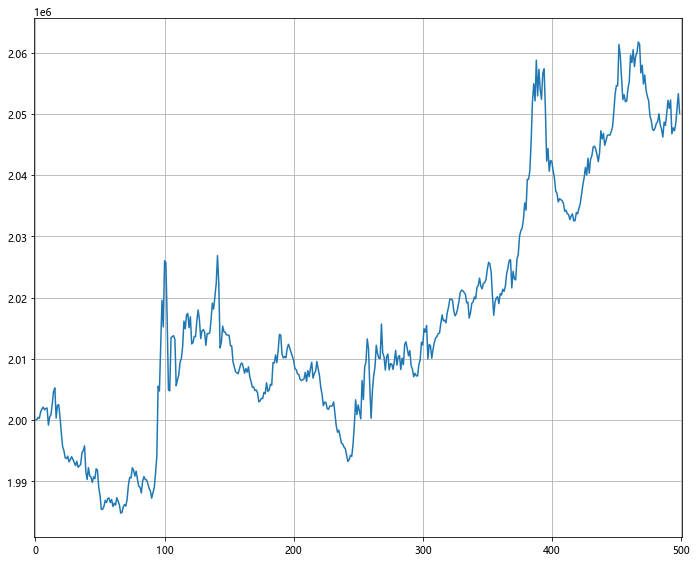

In [10]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()